In [2]:
import numpy as np
import pathlib


def get_mnist():
    with np.load(f"./testing/mnist.npz") as f:
        images, labels = f["x_train"], f["y_train"]
    images = images.astype("float32") / 255
    images = np.reshape(images, (images.shape[0], images.shape[1] * images.shape[2]))
    labels = np.eye(10)[labels]
    return images, labels

In [3]:

import numpy as np
import matplotlib.pyplot as plt


"""
w = weights, b = bias, i = input, h = hidden, o = output, l = label
e.g. w_i_h = weights from input layer to hidden layer
"""
images, labels = get_mnist()
w_1_2 = np.random.uniform(-0.5, 0.5, (100, 784))
w_2_3 = np.random.uniform(-0.5,0.5,(50,100))
w_3_4 = np.random.uniform(-0.5,0.5,(20,50))
w_4_5 = np.random.uniform(-0.5, 0.5, (10, 20))
b_1_2 = np.zeros((100, 1))
b_2_3 = np.zeros((50, 1))
b_3_4 = np.zeros((20,1))
b_4_5 = np.zeros((10,1))

learn_rate = 0.01
nr_correct = 0
epochs = 3
for epoch in range(epochs):
    for img, l in zip(images, labels):
        img.shape += (1,)
        l.shape += (1,)
        # Forward propagation input -> hidden
        h_2 = b_1_2 + w_1_2 @ img
        h_2 = 1 / (1 + np.exp(-h_2))
        h_3 = b_2_3 + w_2_3 @ h_2
        h_3 = 1/(1 + np.exp(-h_3))
        h_4 = b_3_4 + w_3_4 @ h_3
        h_4 = 1/(1+ np.exp(-h_4))
        h_5 = b_4_5 + w_4_5 @ h_4
        h_5 = 1/(1 + np.exp(-h_5))
#         Forward propagation hidden -> output
#         o_pre = b_h_o + w_h_o @ h
#         o = 1 / (1 + np.exp(-o_pre))

        # Cost / Error calculation
        e = 1 / len(h_5) * np.sum((h_5 - l) ** 2, axis=0)
        nr_correct += int(np.argmax(h_5) == np.argmax(l))

        # Backpropagation output -> hidden (cost function derivative)
        delta_h_5 = h_5 - l
        w_4_5 += -learn_rate * delta_h_5 @ np.transpose(h_4)
        b_4_5 += -learn_rate * delta_h_5
        # Backpropagation hidden -> input (activation function derivative)
        delta_h_4 = np.transpose(w_4_5) @ delta_h_5 * (h_4 * (1 - h_4))
        w_3_4 += -learn_rate * delta_h_4 @ np.transpose(h_3)
        b_3_4 += -learn_rate * delta_h_4
        
        delta_h_3 = np.transpose(w_3_4) @ delta_h_4 * (h_3 * (1 - h_3))
        w_2_3 += - learn_rate * delta_h_3 @ np.transpose(h_2)
        b_2_3 += -learn_rate * delta_h_3
        
        delta_h_2 = np.transpose(w_2_3) @ delta_h_3 * (h_2 * (1 - h_2))
        w_1_2 += -learn_rate * delta_h_2 @ np.transpose(img)
        b_1_2 += -learn_rate * delta_h_2

    # Show accuracy for this epoch
    print(f"Acc: {round((nr_correct / images.shape[0]) * 100, 2)}%")
    nr_correct = 0



Acc: 80.59%
Acc: 94.09%
Acc: 95.87%


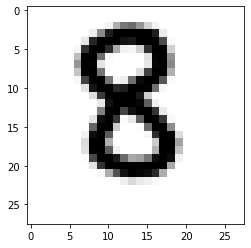

success if its a 6 :)


<ipython-input-7-77f47ec25e6a>:23: RuntimeWarning: overflow encountered in exp
  h_2 = 1 / (1 + np.exp(-h_2))


In [7]:


from PIL import Image
image22 = Image.open("./images/yay.png")
im1 = image22.resize((28,28))
im1.save('./images/WOW.png')

im2 = Image.open("./images/WOW.png",'r')


im3 = im2.convert('L')
im3.save('./images/test_gray.png')
img = np.array(list(im3.getdata()))
def trans(z):
    return(-1*(z-255))
img = trans(img)
img = np.reshape(img,(784,1))

plt.imshow(img.reshape(28, 28), cmap="Greys")
plt.show()

    
# Forward propagation input -> hidden
h_2 = b_1_2 + w_1_2 @ img
h_2 = 1 / (1 + np.exp(-h_2))
h_3 = b_2_3 + w_2_3 @ h_2
h_3 = 1/(1 + np.exp(-h_3))
h_4 = b_3_4 + w_3_4 @ h_3
h_4 = 1/(1+ np.exp(-h_4))
h_5 = b_4_5 + w_4_5 @ h_4
h_5 = 1/(1 + np.exp(-h_5))

print(f"success if its a {h_5.argmax()} :)")


    
    
    